In [1]:
#Import csv and sqlite libraries
import csv,sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [14]:
#Connect to the local DB
con = sqlite3.connect("D:\\Nisanth_DB.db")

In [15]:
#Create the cursor object
cur = con.cursor()

In [4]:
#Import pandas library
import pandas as pd

In [5]:
#Read the csv file
df1 = pd.read_csv("D:\\OnlineRetail2Sample.csv")

In [6]:
#Convert the file read to dataframe
df2 = pd.DataFrame(df1)

In [7]:
df2.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID      int64
Country        object
dtype: object

In [8]:
#Convert the date variable from object to datetime type
df2['DoP'] = pd.to_datetime(df2.DoP)

In [9]:
df2.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01,3.39,17850,United Kingdom


In [10]:
df2.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID             int64
Country               object
dtype: object

In [11]:
#Save the formatted data in a csv format
df2.to_csv("D:\\Retail_DtStd.csv", encoding='utf-8')

In [12]:
#Code to load data from csv file into sql database
with open('D:\\Retail_DtStd.csv','r+') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['InvoiceNo'], i['StockCode'], i['Quantity'], i['DoP'], i['UnitPrice'], i['CustomerID'], i['Country']) for i in dr]

cur.executemany("INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Country) VALUES (?,?,?,?,?,?,?);",to_db)
con.commit()
con.close()

In [16]:
#Read the RFMSeg table (CAR DM)
data1 = pd.read_sql_query("select * from RFMSeg;", con)

In [17]:
df3 = pd.DataFrame(data1)

In [18]:
df3.shape

(4372, 8)

In [19]:
df3.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18,2,1,2011-01-18,0.00,0,0
1,12347,2011-12-07,7,103,2010-12-07,4310.00,0,1
2,12348,2011-09-25,4,22,2010-12-16,1797.24,0,1
3,12349,2011-11-21,1,73,2011-11-21,1757.55,0,0
4,12350,2011-02-02,1,17,2011-02-02,334.40,0,0


In [20]:
#Dropping Recency and Tenure from SQL since the calculation is not correct
df3.pop('Recency')
df3.pop('Tenure')

0       0
1       1
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      0
       ..
4342    1
4343    0
4344    0
4345    0
4346    0
4347    0
4348    0
4349    0
4350    1
4351    0
4352    1
4353    1
4354    0
4355    0
4356    0
4357    0
4358    0
4359    1
4360    0
4361    0
4362    0
4363    0
4364    0
4365    0
4366    0
4367    0
4368    0
4369    0
4370    0
4371    0
Name: Tenure, Length: 4372, dtype: int64

In [21]:
#Set the maxdate as '2011-12-30'
df3['Max_Date'] = '2011-12-30'

In [22]:
#Convert max date, RDate and TDate to datetime formats
df3['Max_Date'] = pd.to_datetime(df3.Max_Date)
df3['RDate'] = pd.to_datetime(df3.RDate)
df3['TDate'] = pd.to_datetime(df3.TDate)


In [23]:
df3.describe()

,Frequency,Product,Monetary
count,4372.000000,4372.000000,4372.000000
mean,5.075480,61.211116,1898.459700
std,9.338754,85.425119,8219.345141
min,1.000000,1.000000,-4287.630000
25%,1.000000,15.000000,293.362500
50%,3.000000,35.000000,648.075000
75%,5.000000,77.000000,1611.725000
max,248.000000,1794.000000,279489.020000


In [24]:
#Calculate Recency
df3['Recency'] = df3['Max_Date'].sub(df3['RDate'], axis=0)

In [25]:
#Convert Recency to number type
import numpy as np
df3['Recency'] = df3['Recency'] / np.timedelta64(1, 'D')

In [26]:
#calculate Tenure
df3['Tenure'] = df3['Max_Date'].sub(df3['TDate'], axis=0)

In [27]:
#Convert Tenure to numeric type
df3['Tenure'] = df3['Tenure'] / np.timedelta64(1, 'D')

In [28]:
df3.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Max_Date,Recency,Tenure
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-30,346.0,346.0
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-30,23.0,388.0
2,12348,2011-09-25,4,22,2010-12-16,1797.24,2011-12-30,96.0,379.0
3,12349,2011-11-21,1,73,2011-11-21,1757.55,2011-12-30,39.0,39.0
4,12350,2011-02-02,1,17,2011-02-02,334.40,2011-12-30,331.0,331.0


In [29]:
#Assign the Recency score to transactions by bucketing the Recency values, 5 being the highest and 1 lowest
def f(row):
    if row['Recency'] < 60:
        val = 5
    elif row['Recency'] <= 120 and row['Recency'] >= 60:
        val = 4
    elif row['Recency'] <= 180 and row['Recency'] >= 120:
        val = 3
    elif row['Recency'] <= 210 and row['Recency'] >= 180:
        val = 2
    else:
        val = 1
    return val

df3['Recency_Score'] = df3.apply(f, axis = 1)

In [30]:
df3.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Max_Date,Recency,Tenure,Recency_Score
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-30,346.0,346.0,1
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-30,23.0,388.0,5
2,12348,2011-09-25,4,22,2010-12-16,1797.24,2011-12-30,96.0,379.0,4
3,12349,2011-11-21,1,73,2011-11-21,1757.55,2011-12-30,39.0,39.0,5
4,12350,2011-02-02,1,17,2011-02-02,334.40,2011-12-30,331.0,331.0,1


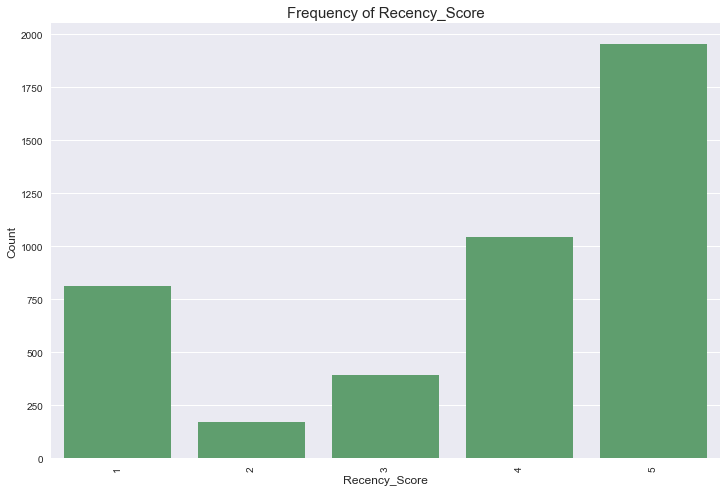

In [31]:
#Plot the frequency of Recency Score
plt.figure(figsize=(12,8))
sns.countplot(x="Recency_Score", data=df3, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Score', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Recency_Score", fontsize=15)
plt.show()

In [32]:
#Create Bins for Frequency values
unique_freq = df3[['Frequency']].drop_duplicates()
unique_freq['Frequency_Band'] = pd.qcut(unique_freq['Frequency'], 5)
unique_freq = unique_freq[['Frequency_Band']].drop_duplicates()
unique_freq

,Frequency_Band
0,"(0.999, 13.8]"
39,"(13.8, 26.6]"
100,"(40.4, 62.2]"
103,"(26.6, 40.4]"
330,"(62.2, 248.0]"


In [33]:
#Assign the frequency score to transactions by binning the Frequency values, 5 being the highest and 1 lowest
def f(row):
    if row['Frequency'] <= 13.8:
        val = 1
    elif row['Frequency'] > 13.8 and row['Frequency'] <= 26.6:
        val = 2
    elif row['Frequency'] > 26.6 and row['Frequency'] <= 40.4:
        val = 3
    elif row['Frequency'] > 40.4 and row['Frequency'] <= 62.2:
        val = 4
    else:
        val = 5
    return val

df3['Frequency_Score'] = df3.apply(f, axis = 1)

In [34]:
df3.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Max_Date,Recency,Tenure,Recency_Score,Frequency_Score
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-30,346.0,346.0,1,1
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-30,23.0,388.0,5,1
2,12348,2011-09-25,4,22,2010-12-16,1797.24,2011-12-30,96.0,379.0,4,1
3,12349,2011-11-21,1,73,2011-11-21,1757.55,2011-12-30,39.0,39.0,5,1
4,12350,2011-02-02,1,17,2011-02-02,334.40,2011-12-30,331.0,331.0,1,1


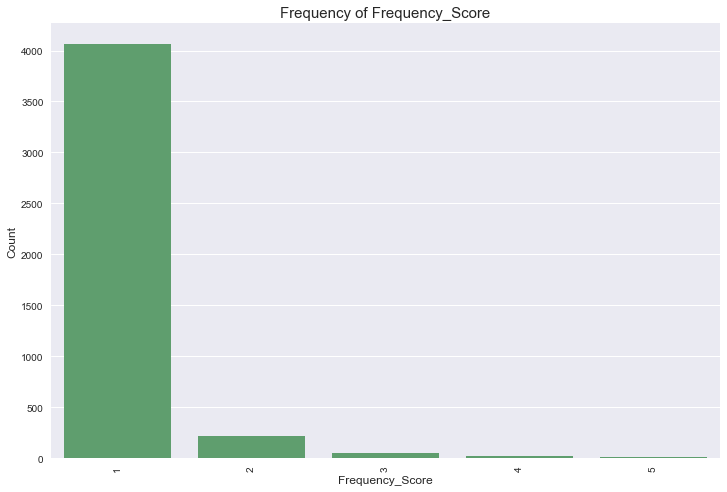

In [35]:
#Plot the count of frequency Score
plt.figure(figsize=(12,8))
sns.countplot(x="Frequency_Score", data=df3, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Frequency_Score', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Frequency_Score", fontsize=15)
plt.show()

In [36]:
#Create Bins for monetary values
unique_monetary = df3[['Monetary']].drop_duplicates()
unique_monetary = unique_monetary[unique_monetary['Monetary'] > 0]
unique_monetary['Monetary_Band'] = pd.qcut(unique_monetary['Monetary'], 5)
unique_monetary = unique_monetary[['Monetary_Band']].drop_duplicates()
unique_monetary

,Monetary_Band
1,"(2058.07, 279489.02]"
2,"(950.702, 2058.07]"
4,"(255.176, 497.076]"
6,"(2.899, 255.176]"
16,"(497.076, 950.702]"


In [37]:
#Assign the monetary score to transactions by binning the monetary values, 5 being the highest and 1 lowest
def f(row):
    if row['Monetary'] <= 255.176:
        val = 1
    elif row['Monetary'] > 255.176 and row['Monetary'] <= 497.076:
        val = 2
    elif row['Monetary'] > 497.076 and row['Monetary'] <= 950.702:
        val = 3
    elif row['Monetary'] > 950.702 and row['Monetary'] <= 2058.07:
        val = 4
    else:
        val = 5
    return val

df3['Monetary_Score'] = df3.apply(f, axis = 1)

In [38]:
df3.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Max_Date,Recency,Tenure,Recency_Score,Frequency_Score,Monetary_Score
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-30,346.0,346.0,1,1,1
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-30,23.0,388.0,5,1,5
2,12348,2011-09-25,4,22,2010-12-16,1797.24,2011-12-30,96.0,379.0,4,1,4
3,12349,2011-11-21,1,73,2011-11-21,1757.55,2011-12-30,39.0,39.0,5,1,4
4,12350,2011-02-02,1,17,2011-02-02,334.40,2011-12-30,331.0,331.0,1,1,2


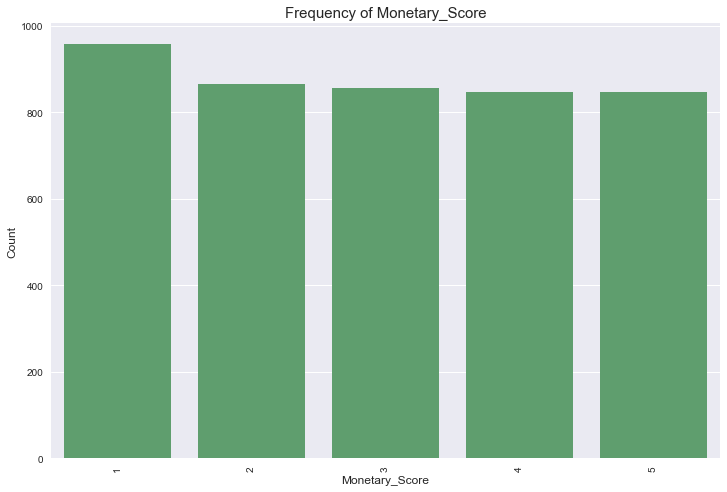

In [39]:
#Plot the frequency of monetary Score
plt.figure(figsize=(12,8))
sns.countplot(x="Monetary_Score", data=df3, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Score', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Monetary_Score", fontsize=15)
plt.show()

In [40]:
#Combined score of all the transactions
df3.iloc[:, [0,9,10,11]].head(10)

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score
0,12346,1,1,1
1,12347,5,1,5
2,12348,4,1,4
3,12349,5,1,4
4,12350,1,1,2
5,12352,5,1,4
6,12353,1,1,1
7,12354,1,1,4
8,12355,1,1,2
9,12356,5,1,5
